# cell detection - YOLO model

GitHub Repo: https://github.com/ultralytics/yolov5

In [1]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
%pip install -qr requirements.txt 

import pandas as pd
import numpy as np
import glob
from PIL import Image
import re
import matplotlib.pyplot as plt
import torch
from yolov5 import utils

display = utils.notebook_init()  

YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.2/78.2 GB disk)


## Data Preparation to trening model

When you use YOLO model, you might create annotation labels and yaml file.

To annotation labels you might use makesense ai https://www.makesense.ai/

The 'yaml' file should content path to data, number of class and class names. 

The train data should separate to images and labels data. Each folder should content train data and val data.

In [2]:
!unzip -q ../train_data.zip -d ../

## Training model YOLOv5s

In [3]:
# Train YOLOv5s on COCO128 for 500 epochs
!python train.py --img 640 --batch 16 --epochs 500 --data cell_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=cell_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, transl

## Loading models

In [4]:
model_v5s = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt') 

### Function to numerical sort data

In [5]:
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

### Validation data

In [8]:
val_img = []
for img in sorted(glob.glob("train_data/images/val/*.png"), key=numericalSort):
    n= Image.open(img)
    i= np.asarray(n)
    val_img.append(i)

## Models prediction

In [9]:
predict_v5s = model_v5s(val_img)

In [10]:
predict_v5s.print()

image 1/6: 16x25 8 cells
image 2/6: 10x20 6 cells
image 3/6: 11x11 3 cells
image 4/6: 16x22 7 cells
image 5/6: 31x25 13 cells
image 6/6: 17x22 8 cells
Speed: 4.8ms pre-process, 8.6ms inference, 1.2ms NMS per image at shape (6, 3, 640, 640)


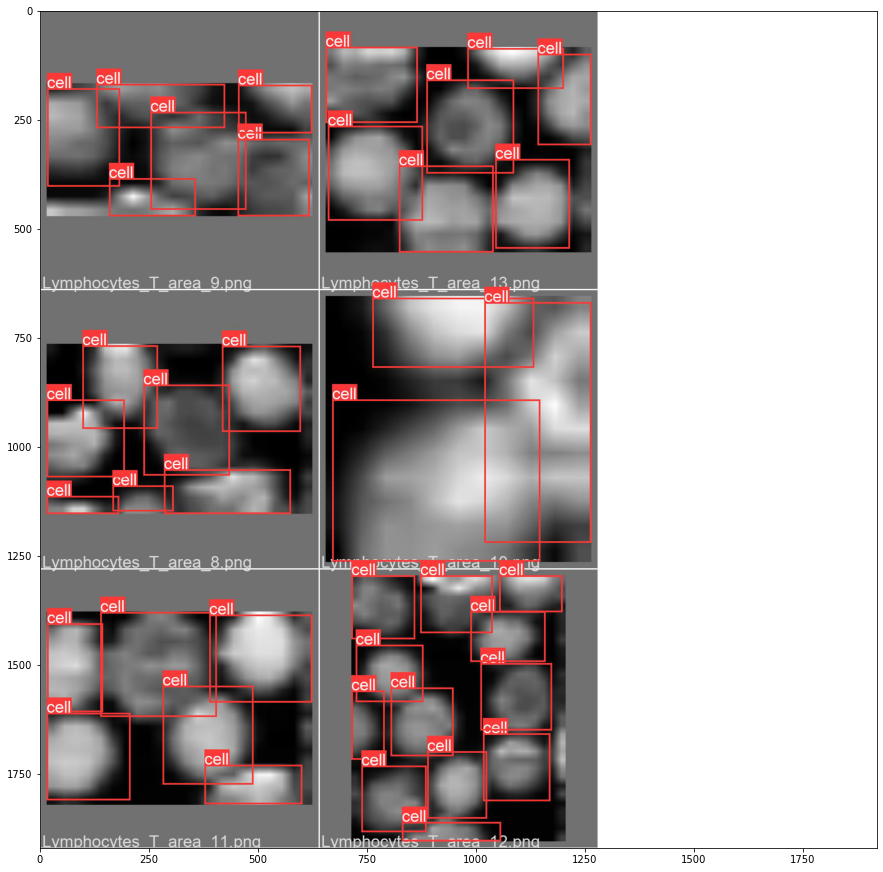

In [11]:
pil_img = Image.open('val_batch0_labels.jpg')
img = np.asarray(pil_img)
plt.figure(figsize=(15,20))
plt.imshow(img)
plt.show()

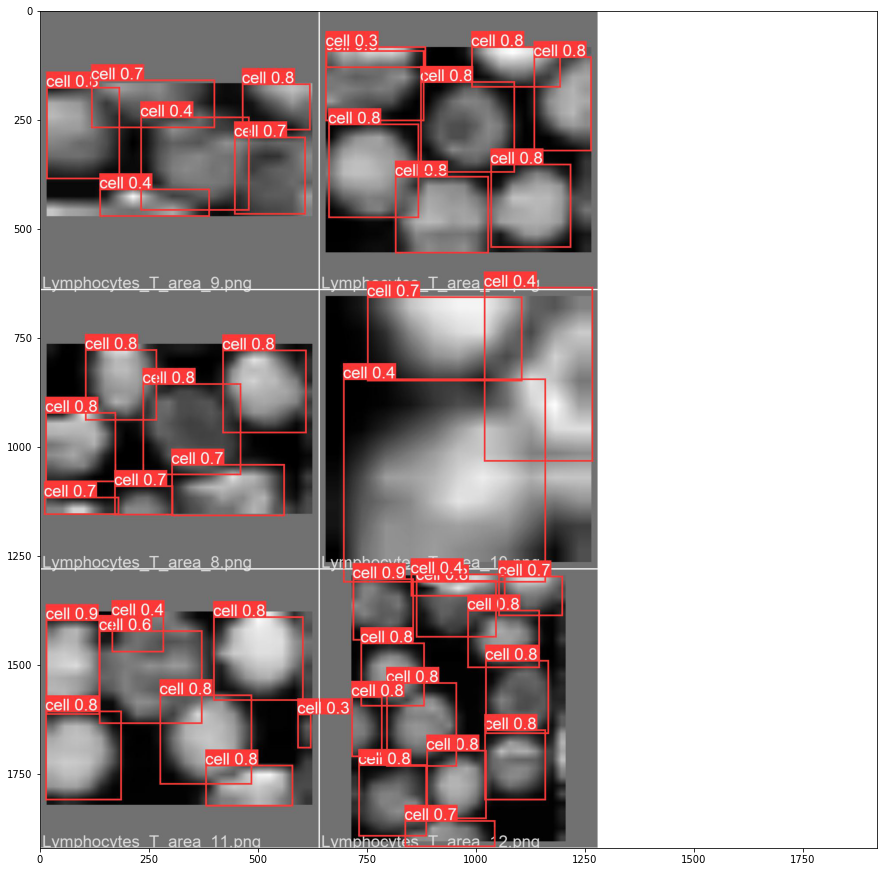

In [12]:
pil_img = Image.open('val_batch0_pred.jpg')
img = np.asarray(pil_img)
plt.figure(figsize=(15,20))
plt.imshow(img)
plt.show()